<a href="https://colab.research.google.com/github/chouat2207/Python/blob/main/2_0Logistic_Regression_Titanic_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Machine Learning Approfondi : Prédiction des survivants du Titanic

## Introduction

Bienvenue dans ce challenge approfondi de machine learning ! Vous allez travailler sur l'un des problèmes les plus emblématiques du domaine : la prédiction des survivants du Titanic. Ce projet vous guidera à travers toutes les étapes essentielles d'un projet de machine learning, de l'exploration détaillée des données à la création, l'amélioration et l'interprétation d'un modèle de régression logistique.

## Contexte historique

Le RMS Titanic était un paquebot britannique qui a fait naufrage dans l'océan Atlantique Nord en avril 1912 après avoir heurté un iceberg lors de son voyage inaugural de Southampton à New York. Sur les 2224 passagers et membres d'équipage, plus de 1500 ont perdu la vie, faisant de cette tragédie l'un des naufrages les plus mortels de l'histoire maritime en temps de paix.

Ce désastre a conduit à d'importantes améliorations dans les réglementations de sécurité maritime et est devenu un sujet d'étude fascinant pour les data scientists, qui cherchent à comprendre quels facteurs ont influencé les chances de survie des passagers.

## Objectif du projet

Votre mission est de développer un modèle de machine learning capable de prédire si un passager a survécu ou non au naufrage du Titanic, en vous basant sur diverses caractéristiques telles que l'âge, le sexe, la classe de billet, etc. Ce faisant, vous découvrirez des insights précieux sur les facteurs qui ont influencé la survie lors de cette tragédie historique.

## Partie 1 : Préparation et exploration approfondie des données

### 1.1 Chargement et préparation initiale des données

**Objectif** : Charger le dataset et effectuer une première inspection des données.

**Instructions** :

1. Importez les bibliothèques nécessaires : pandas, numpy, matplotlib, seaborn.
2. Chargez les données du Titanic depuis le lien fourni avec pandas.
3. Convertissez la colonne 'Survived' en catégories plus lisibles : "Survécu" pour 1, "Décédé" pour 0.
4. Affichez les 10 premières lignes du DataFrame avec `head()`.
5. Utilisez la méthode `info()` pour obtenir un aperçu global du DataFrame, y compris les types de données et les valeurs non-nulles.

**Questions de réflexion** :
- Combien y a-t-il de passagers dans ce dataset ?
- Quels types de données (numériques, catégorielles) pouvez-vous identifier ?
- Y a-t-il des colonnes avec des valeurs manquantes ? Si oui, lesquelles ?



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
# df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Questions de réflexion :

Combien y a-t-il de passagers dans ce dataset ? : 887 entries

Quels types de données (numériques, catégorielles) pouvez-vous identifier ?
Les colonnes avec type (int64 ou float64) sont des colonnes numériques.
les colonnes avec type (object) sont des colonnes catégorielles.

Y a-t-il des colonnes avec des valeurs manquantes ? Si oui, lesquelles ? Non

In [2]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### 1.2 Analyse statistique descriptive

**Objectif** : Obtenir des statistiques descriptives pour mieux comprendre la distribution des données.

**Instructions** :

1. Utilisez la méthode `describe()` pour obtenir des statistiques descriptives des colonnes numériques.
2. Pour les colonnes catégorielles, utilisez `value_counts()` pour voir la distribution des catégories.
3. Calculez le pourcentage global de survie.

**Questions de réflexion** :
- Quelle est la moyenne d'âge des passagers ? Et la médiane ?
- Quelle est la répartition des passagers entre les différentes classes ?
- Y a-t-il une grande différence entre la moyenne et la médiane pour certaines variables ? Si oui, que cela pourrait-il indiquer ?


In [3]:
df_titanic["Age"].describe()

,Age
count,887.000000
mean,29.471443
std,14.121908
min,0.420000
25%,20.250000
50%,28.000000
75%,38.000000
max,80.000000


In [4]:
df_titanic['Sex'].value_counts()

df_titanic['Name'].value_counts()

df_titanic['Survived'].value_counts()

,count
Survived,
0,545
1,342


In [5]:
#Calculez le pourcentage global de survie.
pourcentage_global_survie =(sum(df_titanic['Survived']==1)/len(df_titanic))*100
print(f"Pourcentage global de survie : {pourcentage_global_survie:.2%}")
# ou bien
survival_rate = (df_titanic['Survived'] == 'Survived').mean()
print(f"Pourcentage global de survie : {survival_rate:.2%}")

Pourcentage global de survie : 3855.69%
Pourcentage global de survie : 0.00%


Questions de réflexion :

Quelle est la moyenne d'âge des passagers ? Et la médiane ?

Quelle est la répartition des passagers entre les différentes classes ?

Y a-t-il une grande différence entre la moyenne et la médiane pour certaines variables ? Si oui, que cela pourrait-il indiquer ?

In [6]:
print(df_titanic["Age"].mean())
print(df_titanic["Age"].median())

29.471443066516347
28.0


In [7]:
df_titanic.groupby(df_titanic['Pclass'])['Name'].count()

,Name
Pclass,
1,216
2,184
3,487


les données sont symétriques, la moyenne et la médiane seront proches

### 1.3 Visualisation approfondie des données

**Objectif** : Créer des visualisations pour mieux comprendre les relations entre les variables et leur impact sur la survie.

**Instructions** :

1. Créez un histogramme de la distribution des âges, avec une distinction entre survivants et non-survivants.
2. Réalisez un graphique en barres montrant le taux de survie par classe de passager.
3. Faites un graphique en violon pour comparer la distribution des tarifs (Fare) entre les survivants et les non-survivants.
4. Créez une heatmap de corrélation pour toutes les variables numériques.
5. Réalisez un graphique en barres empilées pour montrer la survie en fonction du sexe et de la classe.

**Questions de réflexion** :
- Y a-t-il une différence notable dans la distribution des âges entre les survivants et les non-survivants ?
- Quelle classe de passagers semble avoir eu le meilleur taux de survie ? Le pire ?
- Pouvez-vous identifier une corrélation entre le prix du billet et les chances de survie ?
- Quelles variables semblent être les plus corrélées avec la survie ?



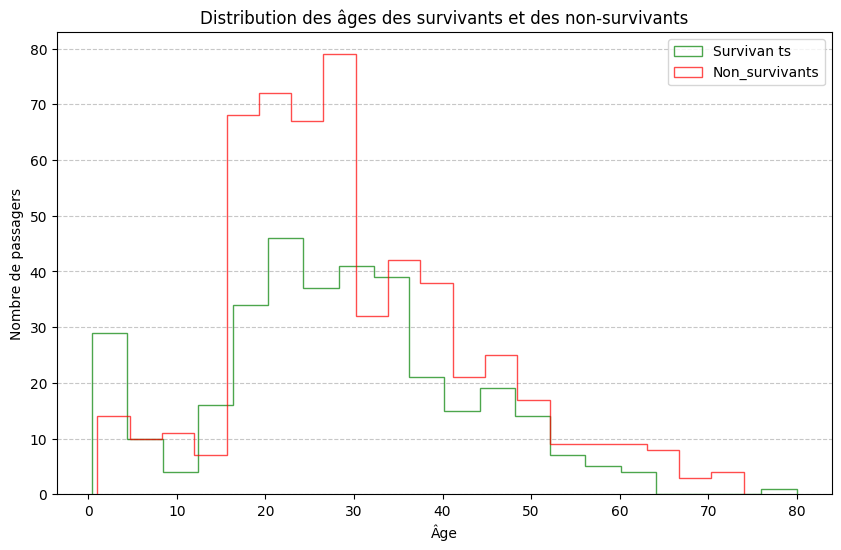

In [8]:
survived = df_titanic[df_titanic['Survived'] == 1]['Age']
no_survived = df_titanic[df_titanic['Survived']==0]['Age']
plt.figure(figsize=(10,6))
plt.hist(survived, bins=20, alpha=0.7, label='Survivan ts', color='green', histtype='step')
plt.hist(no_survived, bins=20, alpha=0.7, label='Non_survivants', color='red', histtype='step')
# Ajouter des labels et un titre
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.title('Distribution des âges des survivants et des non-survivants')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

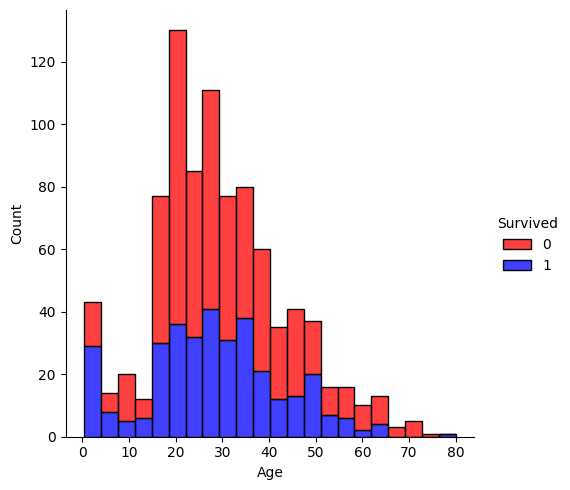

In [9]:
#ou bien
palette_color = ({0 :'red',1:'blue'})
sns.displot(data=df_titanic,x='Age',hue='Survived',palette=palette_color,multiple='stack')

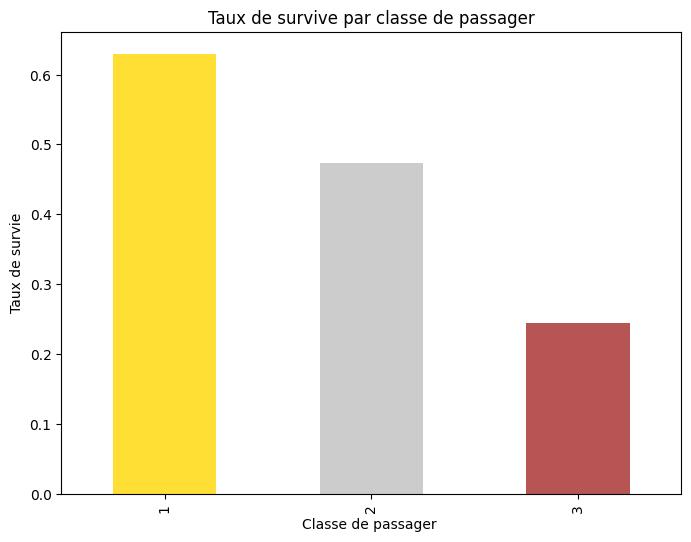

In [10]:
#Réalisez un graphique en barres montrant le taux de survie par classe de passager.
survived_by_classe = df_titanic.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8,6))
survived_by_classe.plot(kind='bar', color=['gold', 'silver', 'brown'], alpha=0.8)
plt.xlabel('Classe de passager ')
plt.ylabel('Taux de survie')
plt.title('Taux de survive par classe de passager')
plt.show()

In [11]:
df_titanic['Survived'] = df_titanic['Survived'].replace({ 1: 'Survived', 0:'Dead'})

In [12]:
df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,Survived,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,Dead,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,Survived,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


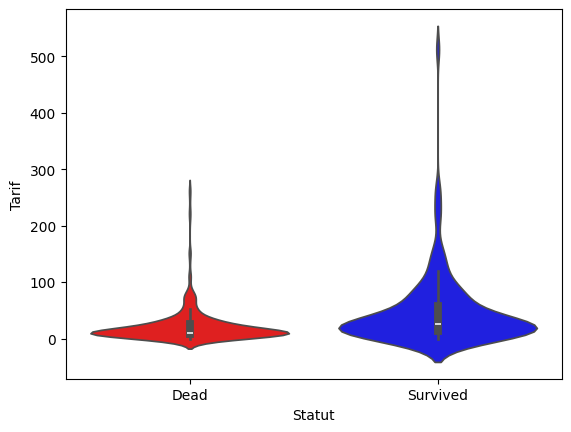

In [13]:
#Faites un graphique en violon pour comparer la distribution des tarifs (Fare) entre les survivants et les non-survivants.
palette_color = ({'Dead' :'red','Survived':'blue'})
sns.violinplot(data = df_titanic,x='Survived' ,y='Fare',hue='Survived',palette= palette_color)
plt.xlabel('Statut')
plt.ylabel('Tarif')
plt.show()

In [14]:
#Créez une heatmap de corrélation pour toutes les variables numériques.
correlation = df_titanic.select_dtypes(include=['float64','int64']).corr()

In [15]:
df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,Survived,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,Dead,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,Survived,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [16]:
correlation

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,-0.548919,0.112329,0.158839,0.215470,1.000000


In [19]:
df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,Survived,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,Dead,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,Survived,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [18]:
df_titanic.drop('Name', axis=1).corr()

ValueError: could not convert string to float: 'Dead'

<Axes: >

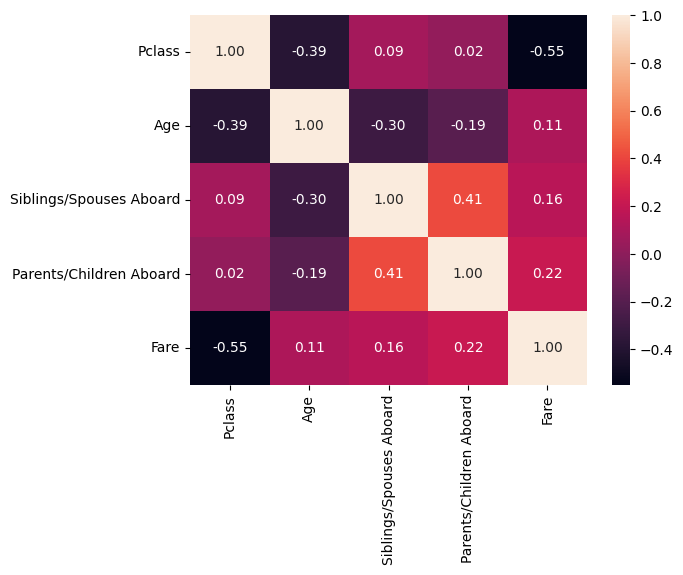

In [20]:
sns.heatmap(correlation, annot=True, fmt='.2f')


<Axes: >

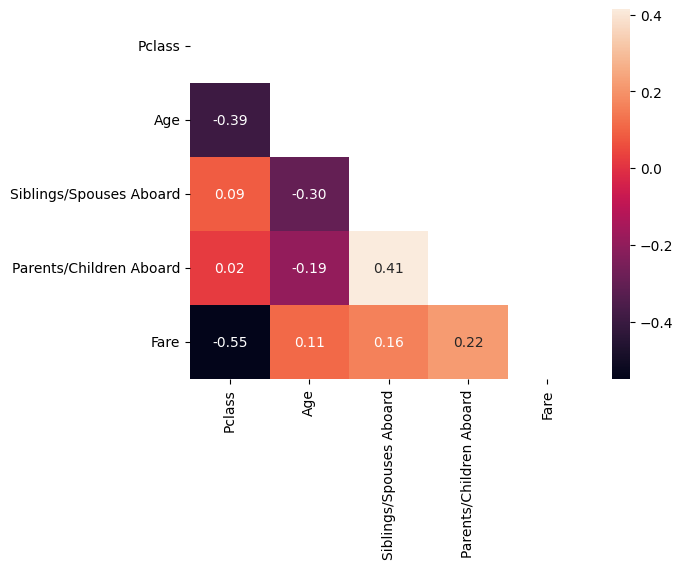

In [21]:
# ou bien
sns.heatmap(correlation, annot=True, fmt='.2f', mask = np.triu(np.ones_like(correlation, dtype=bool)))


In [22]:
df_titanic['Survived'] = df_titanic['Survived'].replace({ 'Survived': 1,'Dead' : 0})

<ipython-input-22-ca80525f6641>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_titanic['Survived'] = df_titanic['Survived'].replace({ 'Survived': 1,'Dead' : 0})


In [23]:
#Réalisez un graphique en barres empilées pour montrer la survie en fonction du sexe et de la classe.

In [24]:
df = df_titanic.groupby(['Sex','Pclass'])['Survived'].mean().reset_index()

In [25]:
df

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.137026


<Axes: xlabel='Sex', ylabel='Survived'>

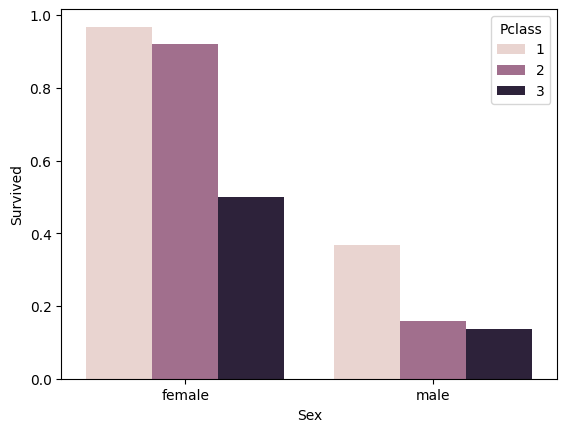

In [26]:
sns.barplot(data=df,x='Sex',y='Survived',hue='Pclass')

<Figure size 1200x600 with 0 Axes>

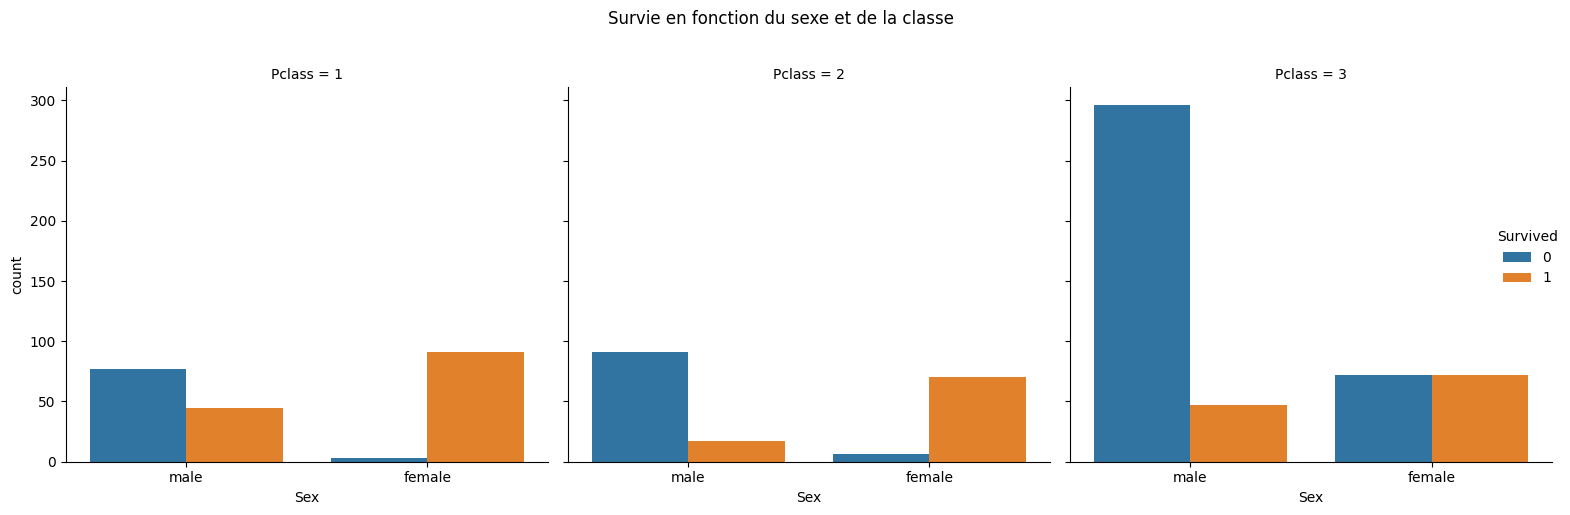

In [27]:
#ou bien
# Graphique en barres empilées pour la survie en fonction du sexe et de la classe
plt.figure(figsize=(12, 6))
sns.catplot(data=df_titanic, x='Sex', hue='Survived', col='Pclass', kind='count')
plt.suptitle('Survie en fonction du sexe et de la classe', y=1.02)
plt.tight_layout()
plt.show()

### 1.4 Analyse des valeurs manquantes

**Objectif** : Identifier et traiter les valeurs manquantes dans le dataset.

**Instructions** :

1. Utilisez la méthode `isnull().sum()` pour compter les valeurs manquantes dans chaque colonne.
2. Créez un graphique montrant le pourcentage de valeurs manquantes pour chaque colonne.
3. Pour la colonne 'Age', analysez si les valeurs manquantes sont distribuées aléatoirement ou s'il y a un biais.
4. Proposez et implémentez une stratégie pour gérer ces valeurs manquantes (par exemple, imputation par la moyenne, la médiane, ou une méthode plus avancée).

**Questions de réflexion** :
- Quelles colonnes ont le plus de valeurs manquantes ?
- Pourquoi certaines colonnes pourraient-elles avoir plus de valeurs manquantes que d'autres ?
- Quelle stratégie d'imputation vous semble la plus appropriée pour chaque colonne avec des valeurs manquantes ? Pourquoi ?



In [28]:
df_titanic.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


## Partie 2 : Préparation du modèle de régression logistique

### 2.1 Sélection et préparation des features

**Objectif** : Préparer les données pour l'entraînement du modèle.

**Instructions** :

1. Sélectionnez les features pertinentes pour votre modèle, en incluant celles que vous avez créées.    
2. Utilisez `pd.get_dummies()` pour encoder les variables catégorielles.
3. Divisez les données en features (X) et target (y).
4. Normalisez les features numériques en utilisant `StandardScaler` de sklearn.

**Questions de réflexion** :
- Pourquoi est-il important d'encoder les variables catégorielles ?
- Quels sont les avantages de la normalisation des features numériques ?
- Y a-t-il des features que vous avez décidé de ne pas inclure ? Pourquoi ?



Sélectionnez les features pertinentes pour votre modèle, en incluant celles que vous avez créées:


'pclass', 'age' , 'sex'


In [29]:
df_titanic = df_titanic.join(pd.get_dummies(df_titanic['Sex'], prefix='Sex'))

In [30]:
pd.get_dummies(df_titanic['Sex'], prefix='Sex')

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
882,False,True
883,True,False
884,True,False
885,False,True


In [31]:
df_titanic.drop(columns='Sex', inplace=True)

In [32]:
df_titanic

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,Mr. Owen Harris Braund,22.0,1,0,7.2500,False,True
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,True,False
2,1,3,Miss. Laina Heikkinen,26.0,0,0,7.9250,True,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,True,False
4,0,3,Mr. William Henry Allen,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,27.0,0,0,13.0000,False,True
883,1,1,Miss. Margaret Edith Graham,19.0,0,0,30.0000,True,False
884,0,3,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,True,False
885,1,1,Mr. Karl Howell Behr,26.0,0,0,30.0000,False,True


In [33]:
X=df_titanic[['Pclass','Fare','Sex_female','Sex_male']]
y=df_titanic['Survived']


In [34]:
X

,Pclass,Fare,Sex_female,Sex_male
0,3,7.2500,False,True
1,1,71.2833,True,False
2,3,7.9250,True,False
3,1,53.1000,True,False
4,3,8.0500,False,True
...,...,...,...,...
882,2,13.0000,False,True
883,1,30.0000,True,False
884,3,23.4500,True,False
885,1,30.0000,False,True


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_scaled

array([[ 0.83052363, -0.50358635, -0.74026551,  0.74026551],
       [-1.56127657,  0.78341245,  1.35086667, -1.35086667],
       [ 0.83052363, -0.49001959,  1.35086667, -1.35086667],
       ...,
       [ 0.83052363, -0.17798419,  1.35086667, -1.35086667],
       [-1.56127657, -0.04633641, -0.74026551,  0.74026551],
       [ 0.83052363, -0.4935369 , -0.74026551,  0.74026551]])

In [38]:
df_X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [39]:
df_X_scaled

,Pclass,Fare,Sex_female,Sex_male
0,0.830524,-0.503586,-0.740266,0.740266
1,-1.561277,0.783412,1.350867,-1.350867
2,0.830524,-0.490020,1.350867,-1.350867
3,-1.561277,0.417948,1.350867,-1.350867
4,0.830524,-0.487507,-0.740266,0.740266
...,...,...,...,...
882,-0.365376,-0.388018,-0.740266,0.740266
883,-1.561277,-0.046336,1.350867,-1.350867
884,0.830524,-0.177984,1.350867,-1.350867
885,-1.561277,-0.046336,-0.740266,0.740266


In [40]:
#pour seulement la colonne Fare
X_continuous = df_titanic[['Fare']]
scaler = StandardScaler()
X_scaled_continuous = scaler.fit_transform(X_continuous)

In [41]:
df_X_scaled_continuous = pd.DataFrame(X_scaled_continuous, columns=X_continuous.columns)

In [42]:
df_X_scaled_continuous

,Fare
0,-0.503586
1,0.783412
2,-0.490020
3,0.417948
4,-0.487507
...,...
882,-0.388018
883,-0.046336
884,-0.177984
885,-0.046336


In [43]:
df_titanic[ 'Fare'] = df_X_scaled_continuous
#pour deux colonnes  : df_titanic[['Age', 'Fare']] = X_continuous_scaled
#RQ: pas necessaire de converture colonne to df

In [44]:
df_titanic

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,Mr. Owen Harris Braund,22.0,1,0,-0.503586,False,True
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,0.783412,True,False
2,1,3,Miss. Laina Heikkinen,26.0,0,0,-0.490020,True,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,0.417948,True,False
4,0,3,Mr. William Henry Allen,35.0,0,0,-0.487507,False,True
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,27.0,0,0,-0.388018,False,True
883,1,1,Miss. Margaret Edith Graham,19.0,0,0,-0.046336,True,False
884,0,3,Miss. Catherine Helen Johnston,7.0,1,2,-0.177984,True,False
885,1,1,Mr. Karl Howell Behr,26.0,0,0,-0.046336,False,True


In [45]:
X=df_titanic[['Pclass','Fare','Sex_female','Sex_male']]
y=df_titanic['Survived']

In [46]:
X

,Pclass,Fare,Sex_female,Sex_male
0,3,-0.503586,False,True
1,1,0.783412,True,False
2,3,-0.490020,True,False
3,1,0.417948,True,False
4,3,-0.487507,False,True
...,...,...,...,...
882,2,-0.388018,False,True
883,1,-0.046336,True,False
884,3,-0.177984,True,False
885,1,-0.046336,False,True


### 2.2 Division des données

**Objectif** : Diviser les données en ensembles d'entraînement et de test.

**Instructions** :

1. Importez `train_test_split` de sklearn.
2. Divisez vos données en ensembles d'entraînement et de test (80% train, 20% test).
3. Utilisez `random_state=36` pour la reproductibilité.
4. Vérifiez que la proportion de survivants est similaire dans les deux ensembles.

**Questions de réflexion** :
- Pourquoi est-il important de diviser les données en ensembles d'entraînement et de test ?
- Que se passerait-il si la proportion de survivants était très différente entre les deux ensembles ?



In [47]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 36)

In [48]:
(X_train.shape[0]/len(X))*100

79.93235625704622

In [49]:
(X_test.shape[0]/len(X))*100

20.067643742953777

### 2.3 Entraînement du modèle initial

**Objectif** : Entraîner un premier modèle de régression logistique et évaluer ses performances.

**Instructions** :

1. Importez `LogisticRegression` de sklearn.
2. Instanciez un modèle de régression logistique avec `random_state=36`.
3. Entraînez le modèle sur les données d'entraînement.
4. Faites des prédictions sur les ensembles d'entraînement et de test.
5. Calculez et affichez la précision (accuracy) sur les deux ensembles.
6. Affichez la matrice de confusion et le rapport de classification pour l'ensemble de test.
7. Affichez les coefficients du modèle et interprétez-les.

**Questions de réflexion** :
- Comment interprétez-vous la différence de précision entre l'ensemble d'entraînement et l'ensemble de test ?
- Quelles features semblent avoir le plus d'impact sur la prédiction selon les coefficients du modèle ?
- Y a-t-il des signes de surapprentissage (overfitting) ou de sous-apprentissage (underfitting) ?



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [51]:
model = LogisticRegression(random_state=36)   #c'est par defaut 36
#paramètres par défaut :
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 36, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [52]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("score accuracy sur l'ensemble d'entrainement:", model.score(X_train,y_train))
print("score  accuracy sur l'ensemble de test : ", model.score(X_test, y_test))
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

score accuracy sur l'ensemble d'entrainement: 0.7926657263751763
score  accuracy sur l'ensemble de test :  0.7584269662921348
0.7926657263751763
0.7584269662921348


In [53]:
#Affichez la matrice de confusion et le rapport de classification pour l'ensemble de test.
matrix = confusion_matrix(y_true=y_test, y_pred= y_test_pred)
matrix  #array

array([[84, 18],
       [25, 51]])

<Axes: >

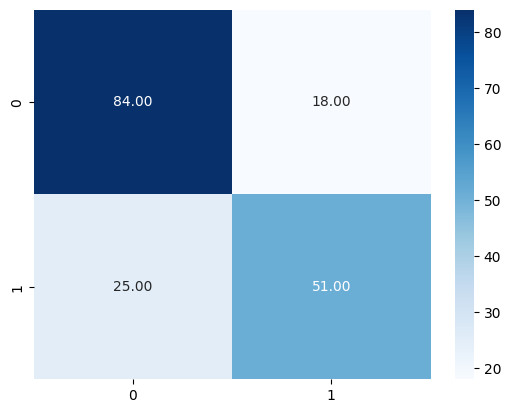

In [54]:
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='Blues')

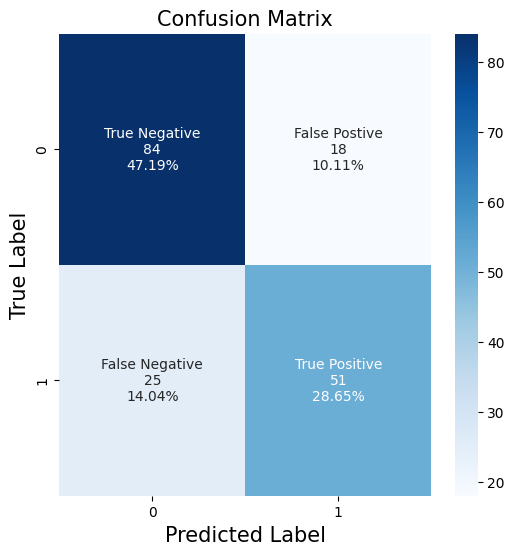

In [55]:
#ou bien plus detaille
plt.figure(figsize=(6,6))
group_names = ['True Negative', 'False Postive', 'False Negative', 'True Positive']
#Calculer les compteurs et les pourcentages
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
# Créer les étiquettes
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')#xticklabels=['Dead','Survived'], yticklabels=['Dead','Survived']
# Ajouter les labels aux axes

plt.ylabel('True Label', fontsize=15)
plt.xlabel('Predicted Label', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [56]:
# 6. Rapport de classification pour l'ensemble de test
print("\nRapport de classification pour l'ensemble de test :")
print(classification_report(y_test, y_test_pred))


Rapport de classification pour l'ensemble de test :
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       102
           1       0.74      0.67      0.70        76

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



In [57]:
# Affichez les coefficients du modèle et interprétez-les.
coefficients = model.coef_
intercept = model.intercept_
print("\nCoefficients du modèle :")
print(coefficients)


Coefficients du modèle :
[[-0.92288148  0.02710195  1.29167547 -1.29201883]]


## Partie 3 : Amélioration et interprétation du modèle

### 3.1 Ajustement des hyperparamètres

**Objectif** : Optimiser les hyperparamètres du modèle pour améliorer ses performances.

**Instructions** :

1. Importez `GridSearchCV` de sklearn.
2. Définissez une grille de recherche pour les hyperparamètres C et penalty.
3. Utilisez la validation croisée (avec GridSearchCV) pour trouver les meilleurs hyperparamètres.
4. Réentraînez le modèle avec les meilleurs hyperparamètres.
5. Comparez les performances de ce nouveau modèle avec le modèle initial.

**Questions de réflexion** :
- Quels hyperparamètres ont donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Comment la validation croisée aide-t-elle à prévenir le surapprentissage ?



In [58]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(random_state=36)
param_grid = {'max_iter': [50,100,150] ,
              'C': np.logspace(-4, 4, 10) ,
              'penalty':['l1', 'l2', 'elasticnet', 'none']}

grid_search = GridSearchCV(logreg, param_grid,cv=5)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=36),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'max_iter': [50, 100, 150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [59]:
# Réentraîner le modèle avec les meilleurs hyperparamètres
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train, y_train)

LogisticRegression(C=0.3593813663804626, max_iter=50, random_state=36)

In [60]:
# Faire des prédictions sur l'ensemble de test
y_pred = best_logreg.predict(X_test)

In [61]:
df_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

In [62]:
df_report

,precision,recall,f1-score,support
0,0.777778,0.823529,0.800000,102.000000
1,0.742857,0.684211,0.712329,76.000000
accuracy,0.764045,0.764045,0.764045,0.764045
macro avg,0.760317,0.753870,0.756164,178.000000
weighted avg,0.762868,0.764045,0.762567,178.000000


### 3.2 Analyse des erreurs

**Objectif** : Comprendre les cas où le modèle se trompe.

**Instructions** :

1. Identifiez les instances mal classées par le modèle dans l'ensemble de test.
2. Analysez les caractéristiques de ces instances mal classées.
3. Créez des visualisations pour comparer les prédictions correctes et incorrectes.

**Questions de réflexion** :
- Y a-t-il des patterns communs parmi les instances mal classées ?
- Quelles améliorations pourriez-vous suggérer pour réduire ces erreurs ?



In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



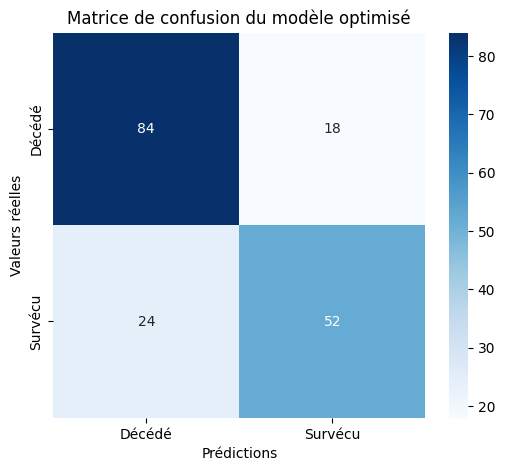


Rapport de classification du modèle optimisé :
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       102
           1       0.74      0.68      0.71        76

    accuracy                           0.76       178
   macro avg       0.76      0.75      0.76       178
weighted avg       0.76      0.76      0.76       178



In [64]:
# Afficher la matrice de confusion pour l'ensemble de test avec le modèle optimisé
conf_matrix_optimized = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=['Décédé', 'Survécu'], yticklabels=['Décédé', 'Survécu'])
plt.title('Matrice de confusion du modèle optimisé')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

# Afficher le rapport de classification pour le modèle optimisé
print("\nRapport de classification du modèle optimisé :")
print(classification_report(y_test, y_pred))

### 3.3 Comparaison avec d'autres modèles

**Objectif** : Comparer les performances de la régression logistique avec d'autres algorithmes.

**Instructions** :

1. Implémentez au moins deux autres modèles (par exemple, Random Forest et SVM).
2. Comparez les performances de ces modèles avec votre modèle de régression logistique optimisé.
3. Discutez des avantages et des inconvénients de chaque approche.

**Questions de réflexion** :
- Quel modèle a donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Quels sont les compromis entre la performance et l'interprétabilité pour chaque modèle ?
- Dans un scénario réel, quel modèle recommanderiez-vous d'utiliser et pourquoi ?



Précision Régression Logistique: 0.7640449438202247
Précision Random Forest: 0.8089887640449438
Précision SVM: 0.7303370786516854


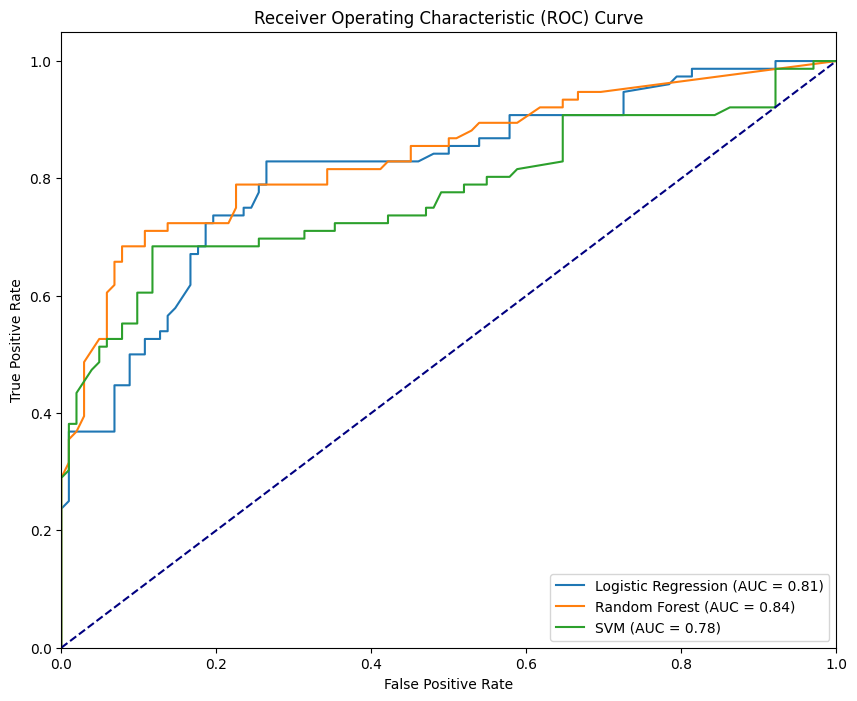

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier(random_state=36)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# SVM
svm_model = SVC(random_state=36)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Comparaison des performances
print("Précision Régression Logistique:", accuracy_score(y_test, y_pred))
print("Précision Random Forest:", accuracy_score(y_test, rf_pred))
print("Précision SVM:", accuracy_score(y_test, svm_pred))

# Comparaison des courbes ROC
from sklearn.metrics import roc_curve, auc

# Fonction pour tracer la courbe ROC
def plot_roc_curve(y_true, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))
plot_roc_curve(y_test, best_logreg.predict_proba(X_test)[:, 1], 'Logistic Regression')
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'Random Forest')
plot_roc_curve(y_test, svm_model.decision_function(X_test), 'SVM')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Conclusion et réflexions finales

1. Résumez les principales découvertes de votre analyse.
2. Quels facteurs semblent avoir le plus influencé la survie sur le Titanic ?
3. Quelles sont les limites de votre analyse et comment pourriez-vous l'améliorer ?
4. Si vous deviez conseiller quelqu'un pour augmenter ses chances de survie sur le Titanic, que lui diriez-vous basé sur votre analyse ?
5. Comment les techniques que vous avez apprises dans ce projet pourraient-elles être appliquées à d'autres problèmes de la vie réelle ?

